---
Practise - Date: 2026-01-16

In [11]:
# Імпорти. Перед цими імпортами - треба встановити sklearn, pandas, numpy 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, classification_report, confusion_matrix

In [46]:
df = pd.read_csv('data\churn.csv') # змінити на свій шлях до файлу

<>:1: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
<>:1: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
C:\Users\Daryna\AppData\Local\Temp\ipykernel_19044\1177987588.py:1: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
  df = pd.read_csv('data\churn.csv') # змінити на свій шлях до файлу


---
Task 1. Зробити EDA та короткі висновки по датасету

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2261,3126-WQMGH,Female,0,Yes,No,49,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),52.15,2583.75,No
4179,8224-DWCKX,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),73.30,828.05,No
4491,7853-WNZSY,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),19.75,19.75,No
5708,7072-MBHEV,Female,1,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),78.10,864.85,No
6741,2180-DXNEG,Female,0,No,No,12,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.00,1062.1,Yes


In [17]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [7]:
df.shape

(7043, 21)

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

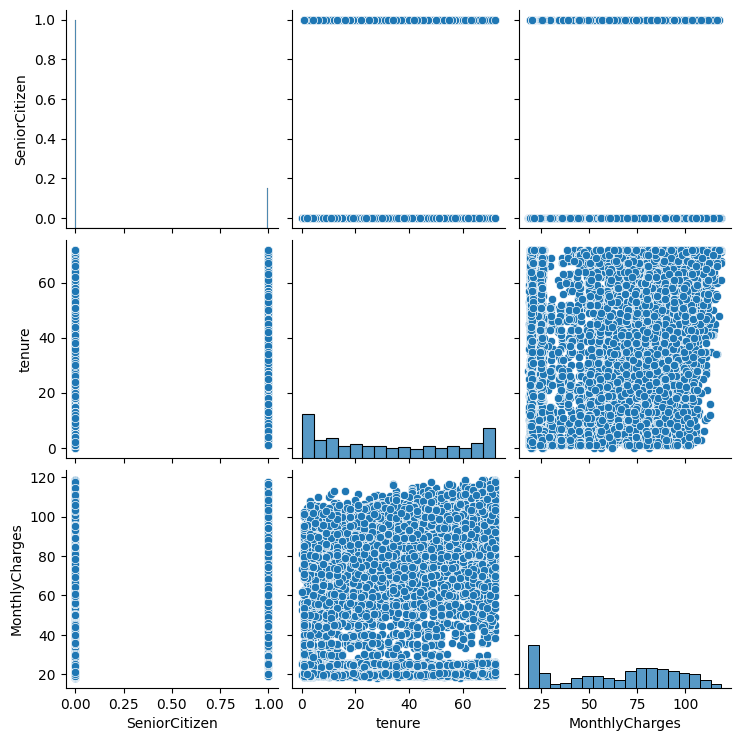

In [12]:
sns.pairplot(df)

In [14]:
df.duplicated().sum()

np.int64(0)

In [44]:
check_nan = df[df['TotalCharges'].isnull()]['customerID'].to_list()

In [47]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["Churn"] = (df["Churn"] == "Yes").astype(int)


# примінити get_dummies для X з параметром drop_first = True, для One-hot encoding


In [48]:
df = df.dropna()

In [49]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [50]:
X = df.drop(columns=['Churn', 'customerID'])
y = df["Churn"]

In [51]:
# примінити get_dummies для X з параметром drop_first = True, для One-hot encoding

X = pd.get_dummies( # One-hot encoding
    X[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']],
    drop_first=True
)

X.head()


,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,True,False,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,True,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,True,False,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [52]:
X.shape

(7032, 26)

In [53]:
# примінити train_test_split, розділити на 80/20, random_state = 42, зробити стратифікація по Churn
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [54]:
# Масштабуємо числові ознаки - використати StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

--- 
Task 2. Примінити LogisticRegression та оцінити результати 

In [56]:
lg = LogisticRegression(max_iter=1000)

lg.fit(X_train, y_train)

lr_proba = lg.predict_proba(X_test_scaled)[:, 1]

lr_proba


d:\python\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.00539627, 0.93668363, 0.00424245, ..., 0.04556628, 0.01252914,
       0.00125384], shape=(1407,))

--- 
Task 3. Примінити Random Forest 

In [57]:
# створити RandomForestClassifier, з параметром n_jobs = -1, n_estimators = 200, random_state = 42

# зробити fit

rf = RandomForestClassifier(
    n_estimators=200,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)

rf_proba = rf.predict_proba(X_test)[:, 1]

--- 
Task 4. Примінити GridSearchCv для RandomForest